<a href="https://colab.research.google.com/github/keertikayo/IEEE_ML_ProjectCycle/blob/master/edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
file_path = '/content/drive/MyDrive/car.jpg'

In [38]:
img = cv2.imread(file_path)

In [39]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [40]:
#noise reduction
blurred_image = cv2.GaussianBlur(gray_img, (3, 3), 0)

In [42]:
#sobel kernel
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

#gradient
gradient_x = cv2.filter2D(blurred_image, cv2.CV_64F, 1, 0)
gradient_y = cv2.filter2D(blurred_image, cv2.CV_64F, 0, 1)

#magnitude calculation
magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

gradient_x = np.uint8(255 * np.abs(gradient_x) / np.max(gradient_x))
greadient_yy = np.uint8(255 * np.abs(gradient_y) / np.max(gradient_y))
magnitude = np.uint8(255 * magnitude / np.max(magnitude))


magnitude = np.clip(magnitude, 0, 255).astype(np.uint8)

<ipython-input-42-f373d96a6385>:13: RuntimeWarning: invalid value encountered in divide
  greadient_yy = np.uint8(255 * np.abs(gradient_y) / np.max(gradient_y))
<ipython-input-42-f373d96a6385>:13: RuntimeWarning: invalid value encountered in cast
  greadient_yy = np.uint8(255 * np.abs(gradient_y) / np.max(gradient_y))


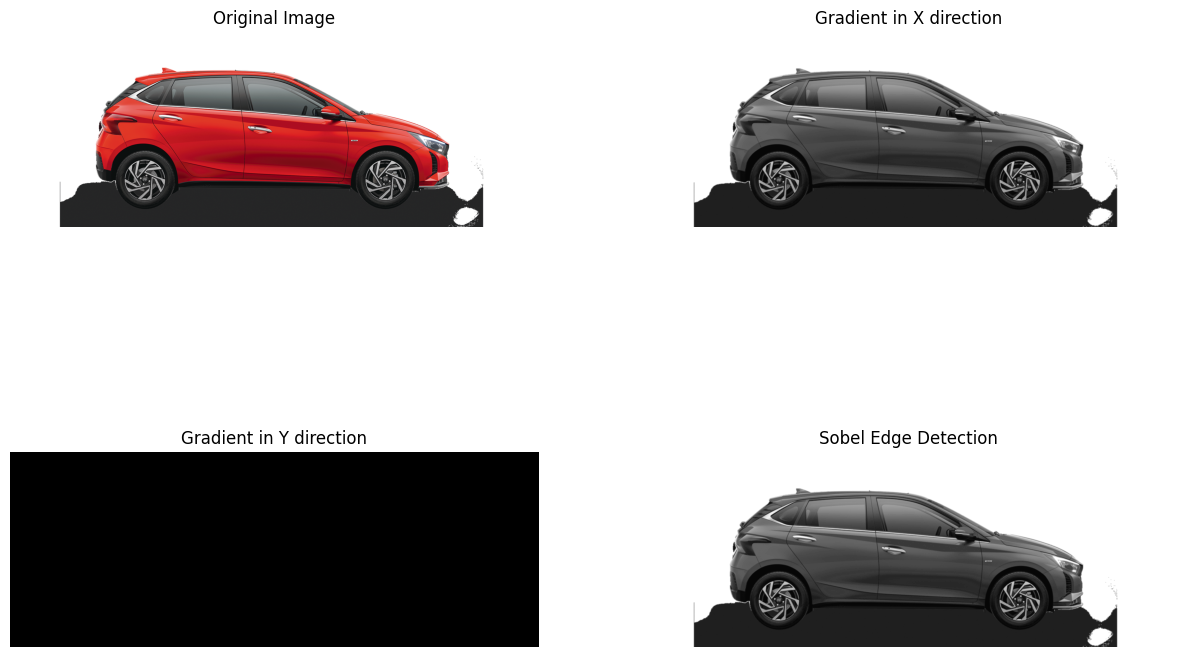

In [44]:

# Display the results
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Gradient in X direction
plt.subplot(2, 2, 2)
plt.imshow(gradient_x, cmap='gray')
plt.title('Gradient in X direction')
plt.axis('off')

# Gradient in Y direction
plt.subplot(2, 2, 3)
plt.imshow(gradient_y, cmap='gray')
plt.title('Gradient in Y direction')
plt.axis('off')

# Edge-detected image
plt.subplot(2, 2, 4)
plt.imshow(magnitude, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.show()